In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#Here I am querying the latest date in the measurement table
late_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(str(late_date))

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(str(query_date))


#Then I am querying the date range within the last 12 months in the table
#I am hard coding the date this because I am stuck
#and I will also pull the precipitation levels also.
coll_query = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >='2016-08-23').\
    filter(Measurement.date <='2017-08-23').all()
coll_query
#old code I want to keep for reference
# engine.execute('SELECT date, prcp FROM measurement 
#WHERE date<="2017-12-31" and date >="2017-01-01"').fetchall()
# conn = engine.connect()
# my_meas = pd.read_sql("SELECT date, prcp FROM measurement 
#WHERE date<='2017-12-31' and date >='2017-01-01'", conn)


# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores


('2017-08-23',)
2016-08-23


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
query_results = pd.DataFrame(coll_query)

In [12]:
query_results

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


In [13]:
query_results.set_index('date',inplace=True)
query_results

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


In [14]:
# Sort the dataframe by date
query_results.sort_values(by=['date'])

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


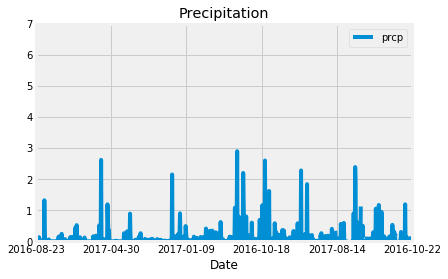

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
query_results.plot()
plt.title('Precipitation')
plt.xlabel('Date')
plt.xlim(0,1000)
plt.ylim(0,7)
plt.legend()



![precipitation](Images/precipitation.png)

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
query_results.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [28]:
# Design a query to show how many stations are available in this dataset?
new_query = session.query(func.count(Station.station)).all()
print(str(new_query))

# my_station = pd.read_sql("SELECT count(*) FROM station", conn)
# my_station1 = pd.read_sql("SELECT * FROM station", conn)    
# my_station.head(50) 



[(9,)]


In [18]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)
result = session.query(func.count(Measurement.id), Measurement.id, Measurement.station).\
group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
result



# columns = inspector.get_columns('Measurement')
# for c in columns:
#     print(c['name'], c["type"])

# stat_count = pd.read_sql("Select count(*), station From measurement group by station order by count(*) desc", conn)
# stat_count.head(20)

# columns = inspector.get_columns('measurement')
# for c in columns:
# print(c['name'], c["type"])
# List the stations and the counts in descending order.

[(2772, 12188, 'USC00519281'),
 (2724, 1, 'USC00519397'),
 (2709, 2725, 'USC00513117'),
 (2669, 9519, 'USC00519523'),
 (2612, 16939, 'USC00516128'),
 (2202, 5434, 'USC00514830'),
 (1979, 14960, 'USC00511918'),
 (1372, 7636, 'USC00517948'),
 (511, 9008, 'USC00518838')]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

calc_temp = session.query(*sel).\
        filter(Measurement.station == 'USC00519281' ).\
        group_by(Measurement.station).\
        order_by(Measurement.station).all()
calc_temp

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

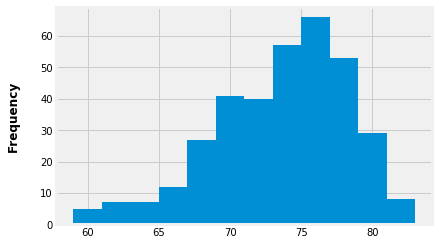

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_observ = session.query(Measurement.station, Measurement.tobs, Measurement.date).\
            filter(Measurement.date >='2016-08-23').\
            filter(Measurement.date<= '2017-08-23').\
            filter(Measurement.station =='USC00519281').all()
temp_observ


df = pd.DataFrame(temp_observ, columns=['station', 'tobs', 'date'])
ax = df.hist(column='tobs', bins=12)
ax = ax[0]

for x in ax:
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)
    x.set_title("")        
# ax = df.hist(column='session_duration_seconds', 
#              bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

# ax = ax[0]
# for x in ax:

# df = pd.DataFrame(calc_temps, columns=['station', 'tobs', 'tobs', 'tobs'])
# df.set_index('station', inplace=True)
# df.plot.bar()
# df.tight_layout()

![precipitation](Images/station-histogram.png)

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [23]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

print(calc_temps('2016-08-26','2016-08-30'))


[(71.0, 77.90322580645162, 84.0)]


/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(left, right)


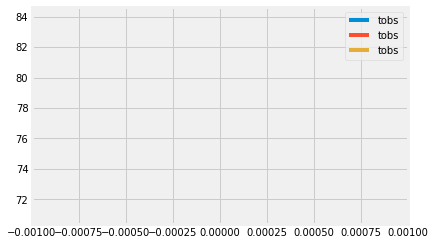

In [24]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


dframe = pd.DataFrame(calc_temps('2016-08-26','2016-08-30'), columns=['tobs', 'tobs', 'tobs'])

dframe.plot()


In [25]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel = [func.sum(Measurement.prcp), Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation]

qry = session.query(*sel).\
        filter(Measurement.station==Station.station).\
        filter(Measurement.date >='2016-08-26').\
        filter(Measurement.date <='2016-08-30').\
        group_by(Measurement.station).all()
qry

# for record in qry:
#     (m_prcp, s_station, s_name, s_lat, s_long, s_elev)
#     print('{m_prcp}{s_station}{s_name} {s_lat}{s_long}{s_elev}')

# sel = [EA.family, EA.genus, EA.species, NA.family, NA.genus, NA.species]
# same_sporder = session.query(*sel).filter(EA.sporder == NA.sporder).limit(10).all()

# for record in same_sporder:
#     (ea_fam, ea_gen, ea_spec, na_fam, na_gen, na_spec) = record
#     print(
#         f"The European animal '{ea_fam} {ea_gen} {ea_spec}'"
#         f"belongs to the same sporder as the North American animal '{na_fam} {na_gen} {na_spec}'.")

[(0.52, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (0.22000000000000003,
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 (3.0199999999999996,
  'USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 (0.06, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (1.08,
  'USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 (0.01, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (0.14,
  'USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5)]

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
